In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

In [ ]:



#from matplotlib import pyplot as plt



class ExtractExudates:
    
    jpegImg = 0
    grayImg = 0
    curImg = 0

    def setImage(self, img):
        self.jpegImg = img
        self.curImg = np.array(img)    ##Convert jpegFile to numpy array (Required for CV2)

    def getImage(self):
        return self.curImg
        
    def greenComp(self):
    ###Extracting Green Component
        gcImg = self.curImg[:,:,1]
        self.curImg = gcImg

    def applyCLAHE(self):
    #Applying Contrast Limited Adaptive Histogram Equalization (CLAHE)
        clahe = cv2.createCLAHE()
        clImg = clahe.apply(self.curImg)
        self.curImg = clImg
        
# create a CLAHE object (Arguments are optional).
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#claheImg = clahe.apply(clImg)
#cv2.imwrite('clahe_2.jpg',claheImg)

    def applyDilation(self):
        #Creating Structurig Element
        strEl = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
        #Dilation
        dilateImg = cv2.dilate(self.curImg, strEl)
        self.curImg = dilateImg

    def applyThreshold(self):
        #Thresholding with Complement/Inverse
        retValue, threshImg = cv2.threshold(self.curImg, 220, 220, cv2.THRESH_BINARY)
        self.curImg = threshImg

    def applyMedianFilter(self):
        #Median Filtering
        medianImg = cv2.medianBlur(self.curImg,5)
        self.curImg = medianImg
    

In [30]:
def identify_OD(image):
        newfin = cv2.dilate(image, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=2)
        mask = np.ones(newfin.shape[:2], dtype="uint8") * 255
        ycontours, yhierarchy = cv2.findContours(newfin.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        prev_contour = ycontours[0]
        i = 0
        xyz = ycontours
        for cnt in ycontours:
            if cv2.contourArea(cnt) >= cv2.contourArea(prev_contour):
                
                prev_contour = cnt
                x = i
                
            i = i+1
        ct = ycontours[x]
        ss = cv2.drawContours(newfin, [ct], 0 , (0,255,0), 3)       
        M = cv2.moments(prev_contour)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        
        return (cx,cy,ss,xyz)

def get_DistanceFromOD_data(image, centre):
        my_image = image.copy()
        x_cor = centre[0]
        y_cor = centre[1]
        feature_5 = np.reshape(image, (image.size,1))
        k = 0
        i = 0
        j = 0
        while i < image.shape[0]:
            j = 0
            while j < image.shape[1]:
                feature_5[k] = math.fabs(x_cor-i) + math.fabs(y_cor-j)
                j = j+1
                k = k+1
            i = i+1
        return feature_5

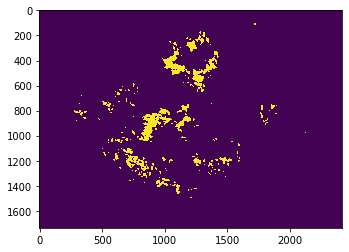

In [102]:

image = cv2.imread("F:/ML/Blindness detection/train_images/0f96c358a250.png")
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imshow('Original image',image)
#cv2.imshow('Gray image', gray)
greenImg = image[:,:,1]
#plt.imshow(image)
plt.imshow(greenImg)

clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(200,200))
clImg = clahe.apply(greenImg)
plt.imshow(clImg)

#equ = cv2.equalizeHist(clImg) 
#plt.imshow(equ)

strEl = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
#Dilation
dilateImg = cv2.dilate(clImg, strEl)
plt.imshow(dilateImg)

retValue, threshImg = cv2.threshold(dilateImg, 200, 255, cv2.THRESH_BINARY)
plt.imshow(threshImg)

medianImg = cv2.medianBlur(threshImg,5)
plt.imshow(medianImg)

In [54]:
def findCircle(src_gray,src):
    
    circles = cv2.HoughCircles(src_gray,cv2.HOUGH_GRADIENT,1, 10, 200, 100, 1, 1)
    for i in circles:
        center = [cv2.cvRound(circles[i][0]), cv2.cvRound(circles[i][1])]
        radius = cvRound(circles[i][2])
        circle( src, center, 3, Scalar(0,255,0), -1, 8, 0 )
        circle( src, center, radius, Scalar(0,0,255), 3, 8, 0 )

    #namedWindow( "Hough Circle Transform Demo", CV_WINDOW_AUTOSIZE );
    return src;


1293
978
[array([[[   0,    0]],

       [[   0, 1957]],

       [[2587, 1957]],

       [[2587,    0]]], dtype=int32)]


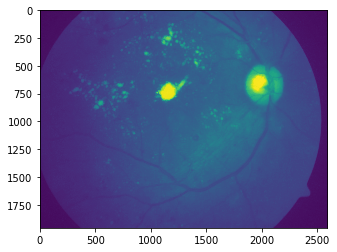

In [31]:
(x,y,mask,xyz)=identify_OD(gray)
print(x)
print(y)
plt.imshow(mask)
print(xyz)
#centre = [x,y]
#plt.imshow(findCircle(gray,image))
#feature = get_DistanceFromOD_data(image, centre)
#print(feature)